# COSC 74 - Homework 3
## Nikhil Pande


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [110]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [111]:
def sigmoid(x):
    #Your code here
    return (1)/(1+np.exp(0-x))

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [112]:
#Your linear model from HW2
def model(x,w):
    # dot product
    y = np.dot(x.T, w[1:]) + w[0]
    return y

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    cost=-(1/float(y.size))*np.sum(y*np.log(sigmoid(model(x,w)))+(1-y)*np.log(1-sigmoid(model(x,w))))

    return cost

Run the code below to read a data file and plot a scatter plot of x vs y.

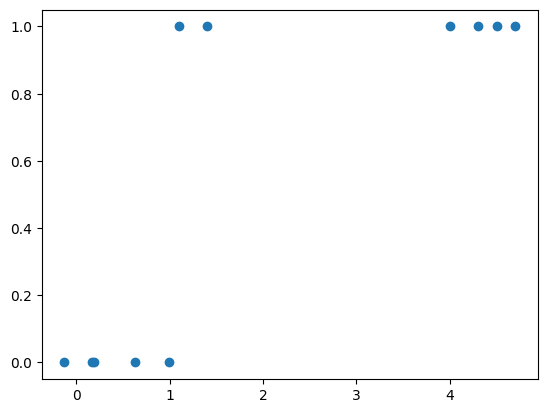

In [113]:
csvname = '/content/drive/MyDrive/COSC74/HW3/2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

plt.scatter(x,y)

In [114]:
print(y)

[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]


Q3) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=1500,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [115]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):

    # gradient.
    gradient = grad(g) # This is how you use the autograd library to find the gradient of a function.

    # Initialize the weight and cost history.
    weight_history = []
    cost_history = []

    weight_history.append(w)
    cost_history.append(g(w, x, y))

    # Apply the gradient descent, according to the slope (determined by the 'weight', gradient, and alpha).
    for k in range(1, max_its):
      weight_history.append(weight_history[k - 1] - alpha * gradient(weight_history[k - 1], x, y))
      cost_history.append(g(weight_history[k], x, y))

    return weight_history, cost_history




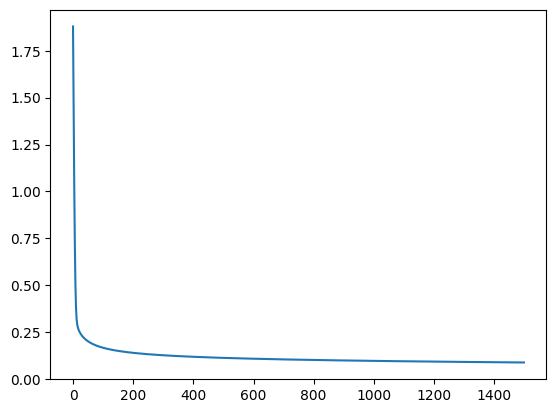

In [116]:
# gradient descent parameters
alpha = 1.0
max_its = 1500
w = np.array([3.0, 3.0])

##Call the gradient_descent function here
weight_history, cost_history = gradient_descent(cross_entropy,alpha,max_its,w,x,y)


##Plot the cost history here
plt.plot(range(1500), cost_history)


Q4) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [117]:
def logistic_regression(learned_w,x):
    positive_class_prob = sigmoid(model(x, learned_w))
    return positive_class_prob

Q5) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from before.


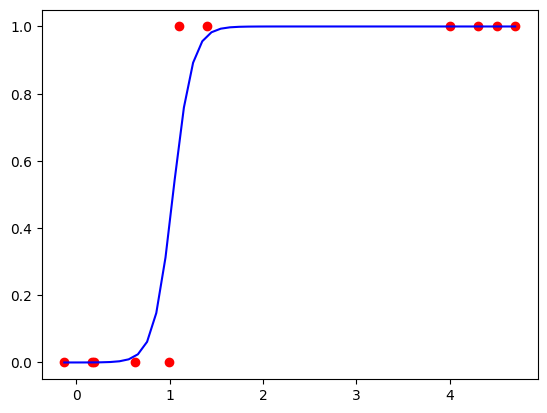

In [118]:
s = np.linspace(np.min(x),np.max(x))
# #Your code here

# the optimal weight is the final one
min_weight=weight_history[max_its-1]

fit= sigmoid(min_weight[0]+s*min_weight[1])

# plot
plt.figure()
plt.scatter(x,y,color='red')
plt.plot(s,fit,color='blue')



Q6) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [119]:
def logistic_regression_modified(learned_w,x, threshold):
    arr = logistic_regression(learned_w, x)
    class_label = []

    # iterate through array, appending 1 or 0
    for i in range(len(arr)):
        if (arr[i]) > threshold:
            class_label.append(1)
        else:
            class_label.append(0)


    return class_label

Q7) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [120]:
def evaluate(y_actual,y_pred):
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    # loop through and check each pair
    for i in range(len(y_pred)):
        if (y_actual[0][i] == 1):
            if (y_pred[i] == 1):
                true_positive += 1
            else:
                false_negative += 1
        else:
            if (y_pred[i] == 1):
                false_positive += 1
            else:
                true_negative += 1

    # Calculate accuracy
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)


    ## Your code here
    return false_positive, false_negative, true_positive, true_negative, accuracy

evaluate(y,logistic_regression_modified(min_weight,x, 0.5))


(0, 0, 6, 5, 1.0)

Q8) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [121]:
def perceptron_cost(w,x,y):
   #Your code here
    cost = np.sum(np.log(1 + np.exp((-y)*model(x, w))))


    return cost

Q9) [10 points]
* Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=1500,w=[1.0,1.0], and alpha=1.0.
* Save the cost and weight history returned by the gradient descent function.
* Plot the cost history.
* Answer: Which cost seems to do better on this dataset? Why do think that is?


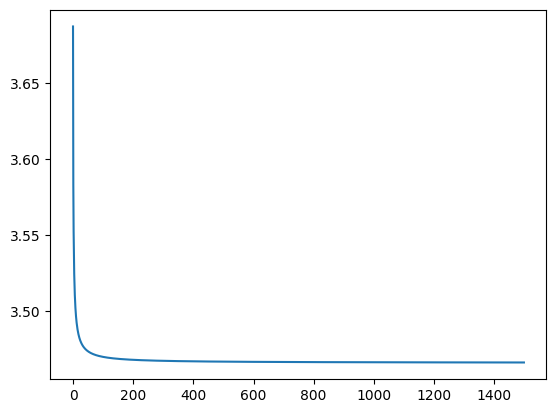

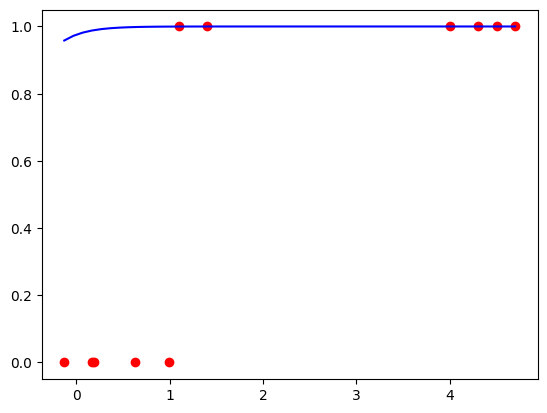

In [122]:
# gd parameters
alpha = 1.0
max_its = 1500
w = np.array([1.0, 1.0])

##Call the gradient_descent function here
weight1, cost1 = gradient_descent(perceptron_cost, alpha, max_its, w, x, y)



##Plot the cost history here
plt.plot(range(1500), cost1)


##PLOT learned curve to see model performance
s = np.linspace(np.min(x),np.max(x))

# the optimal weight is the final one
min_weight=weight1[max_its-1]

fit= sigmoid(min_weight[0]+s*min_weight[1])

# plot
plt.figure()
plt.scatter(x,y,color='red')
plt.plot(s,fit,color='blue')

### Answer:
The cross entropy model seems to do a lot better on this dataset, likely because our data assumes a non-linear shape. In other words, non-linear regression models this data well, so the linear boundary will work well.

Cross entropy also takes into account the probability of 0 and 1 for each observation, so that it can penalize predictions that are confident yet not correct. This works better for logistic regression and allows us to find an effective linear boundary.

Q10) [11 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns.

* Read the data file. (Note that the first line is the header describing each column.)
* Use the data above to set y to be the "target" and X to be the remaining columns.
* Split your data into 80% train 20% test using train_test_split.
* Use sklearn to fit a logistic regression model on your training set. Use all the default parameters. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [123]:
## import logistic regression and the train_test split functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##Your code here

# Read the data file
heartname = '/content/drive/MyDrive/COSC74/HW3/heart.csv'
heart = np.loadtxt(heartname, skiprows = 1, delimiter = ',')

# Use the data above to set y to be the "target" and X to be the remaining columns.
X = heart[:,0:13]
y = heart[:,13]

#Split your data into 80% train 20% test using train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

Q11) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [124]:
##Your code here

probs = lr.predict_proba(X_test)


Q12) [12 points]

Now you will report your results.

* Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. (I.e., you should no longer have tuples.)
* Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters).
* Print out the thresholds generated by the roc_curve function.
* Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score.

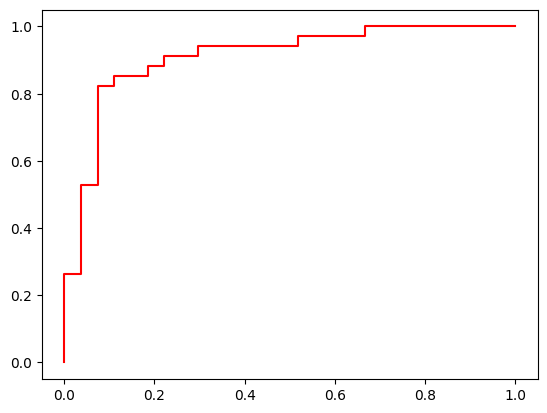

In [125]:
##Your code here
from sklearn import metrics
# Filter the rpedicted probabilites to an array containing only probs for class 1
probs1 = []
for prob in probs:
    probs1.append(prob[1])


# Plot ROC curve
roc = metrics.roc_curve(y_test, probs1)

plt.plot(roc[0],roc[1], color='red')


In [126]:
##Your code here
# PRINT thresholds from roc function
print(roc[2])


# use roc_auc score from sklearn metrics

print(metrics.roc_auc_score(y_test, probs1))

[1.99494298 0.99494298 0.92836038 0.92718312 0.81586539 0.81077875
 0.70542236 0.65844557 0.65275196 0.62687693 0.60003387 0.53970966
 0.51334335 0.37969821 0.35348642 0.11759705 0.10134928 0.08201668
 0.07238448 0.00367089]
0.9095860566448801
